<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Be confident about your data analysis skills


This dataset is from the story: <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains average serving sizes per person such as average wine, spirit, beer servings, as well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. At the end of the lab, you will be instructed on how you can share your notebook.


You will need the following libraries:


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


This function will download the dataset into your browser 


<b>Importing the Data</b>


In [46]:
path = 'drinks.csv'

Load the csv:


In [47]:
df= pd.read_csv(path)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [21]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute `dtype`.


In [9]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [34]:

continent_dict = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa',
    'Andorra': 'Europe', 'Angola': 'Africa', 'Argentina': 'South America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Brazil': 'South America',
    'Canada': 'North America', 'China': 'Asia', 'Denmark': 'Europe',
    'Egypt': 'Africa', 'Finland': 'Europe', 'France': 'Europe',
    'Germany': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Italy': 'Europe', 'Japan': 'Asia', 'Kenya': 'Africa',
    'Mexico': 'North America', 'Morocco': 'Africa',
    'New Zealand': 'Oceania', 'Nigeria': 'Africa', 'Norway': 'Europe',
    'Pakistan': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe',
    'Qatar': 'Asia', 'Russia': 'Europe', 'Saudi Arabia': 'Asia',
    'South Africa': 'Africa', 'South Korea': 'Asia', 'Spain': 'Europe',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Thailand': 'Asia',
    'Turkey': 'Asia', 'UK': 'Europe', 'USA': 'North America',
    'Vietnam': 'Asia','Antigua & Barbuda': 'North America', 'Armenia': 'Asia', 'Azerbaijan': 'Asia',
    'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Belize': 'North America', 'Benin': 'Africa', 'Bhutan': 'Asia',
    'Bolivia': 'South America', 'Bosnia-Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', "Cote d'Ivoire": 'Africa', 'Cabo Verde': 'Africa',
    'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Chile': 'South America', 'Colombia': 'South America',
    'Comoros': 'Africa', 'Congo': 'Africa', 'Cook Islands': 'Oceania',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America',
    'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'North Korea': 'Asia',
    'DR Congo': 'Africa', 'Djibouti': 'Africa', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'El Salvador': 'North America', 'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa',
    'Fiji': 'Oceania', 'Gabon': 'Africa', 'Gambia': 'Africa',
    'Georgia': 'Asia', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Grenada': 'North America', 'Guatemala': 'North America',
    'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America',
    'Haiti': 'North America', 'Honduras': 'North America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Ireland': 'Europe', 'Israel': 'Asia', 'Jamaica': 'North America',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kiribati': 'Oceania',
    'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia',
    'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Madagascar': 'Africa', 'Malawi': 'Africa',
    'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa',
    'Malta': 'Europe', 'Marshall Islands': 'Oceania', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Micronesia': 'Oceania', 'Monaco': 'Europe',
    'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Mozambique': 'Africa',
    'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nauru': 'Oceania',
    'Nepal': 'Asia', 'Netherlands': 'Europe', 'Nicaragua': 'North America',
    'Niger': 'Africa', 'Niue': 'Oceania', 'Oman': 'Asia',
    'Palau': 'Oceania', 'Panama': 'North America', 'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Moldova': 'Europe', 'Romania': 'Europe',
    'Russian Federation': 'Europe', 'Rwanda': 'Africa',
    'St. Kitts & Nevis': 'North America', 'St. Lucia': 'North America',
    'St. Vincent & the Grenadines': 'North America', 'Samoa': 'Oceania',
    'San Marino': 'Europe', 'Sao Tome & Principe': 'Africa',
    'Senegal': 'Africa', 'Serbia': 'Europe', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'Solomon Islands': 'Oceania', 'Somalia': 'Africa',
    'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America',
    'Swaziland': 'Africa', 'Syria': 'Asia', 'Tajikistan': 'Asia',
    'Macedonia': 'Europe', 'Timor-Leste': 'Asia', 'Togo': 'Africa',
    'Tonga': 'Oceania', 'Trinidad & Tobago': 'North America',
    'Tunisia': 'Africa', 'Turkmenistan': 'Asia', 'Tuvalu': 'Oceania',
    'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'Tanzania': 'Africa',
    'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania',
    'Venezuela': 'South America', 'Yemen': 'Asia',
    'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}


df['continent']= df['country'].map(continent_dict).fillna('unknown')


print (df.groupby('continent')['wine_servings'].sum())




continent
Africa            862
Asia              491
Europe           6308
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [35]:
df.groupby('continent')['beer_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.0,32.0,76.00,376.0
Asia,46.0,32.108696,36.747927,0.0,5.0,19.5,55.75,140.0
Europe,43.0,206.348837,91.676939,0.0,145.5,224.0,274.50,361.0
North America,23.0,145.434783,79.621163,1.0,80.0,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.0,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.5,162.5,198.00,333.0


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


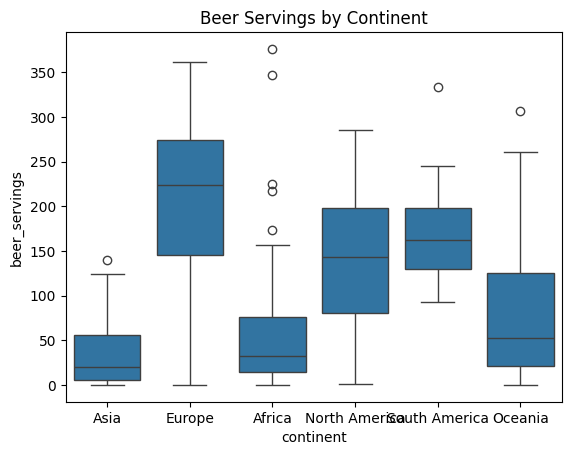

In [38]:
sns.boxplot(x='continent', y='beer_servings', data=df)
plt.title('Beer Servings by Continent')
plt.show()

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


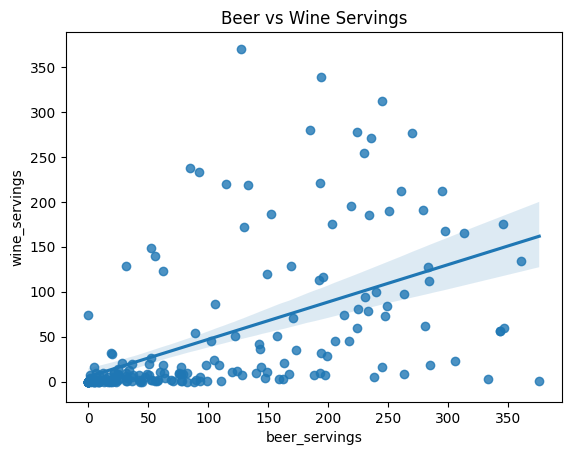

In [39]:
import seaborn as sns 
sns.regplot(x='beer_servings', y='wine_servings', data=df)
plt.title('Beer vs Wine Servings')
plt.show()

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [40]:

X = df[['wine_servings']]
y = df['total_litres_of_pure_alcohol']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)


lm = LinearRegression()
lm.fit(X_train, y_train)

r2 = lm.score(X_test, y_test)
print("R2 Score:", r2)

R2 Score: 0.1769859368705997


<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data by using the provided code:


In [41]:
from sklearn.linear_model import LinearRegression

features = ['beer_servings', 'spirit_servings', 'wine_servings']
X = df[features]
y = df['total_litres_of_pure_alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

lm = LinearRegression()
lm.fit(X_train, y_train)


print("R2 on test data:", lm.score(X_test, y_test))

R2 on test data: 0.6990304512837943


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])


pipe.fit(X_train, y_train)
print("R2 using pipeline:", pipe.score(X_test, y_test))

R2 using pipeline: 0.7076376133886035


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculating the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$.


In [43]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print("R2 using Ridge regression:", ridge.score(X_test, y_test))

R2 using Ridge regression: 0.699030454901918


<b>Question 10</b>: Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data and setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screenshot of your code and the $R^{2}$.


In [44]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

print("R2 using 2nd-order polynomial + Ridge:", ridge_poly.score(X_test_poly, y_test))

R2 using 2nd-order polynomial + Ridge: 0.7076376228095793


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01"> CLICK HERE</a> to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi. You can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
